# Proyecto Módulo 3

EQUIPO 6:

1.   ANDREA XCARET LOPEZ HERNANDEZ (lopezxcaret00@gmail.com)
2.   JAQUELINE ALEJANDRA BALDERAS ROBLERO (jakibald@gmail.com)
3.   SUSANA ELIZABETH SANTIZ VAZQUEZ (x170008@unach.mx)
4.   DENNIS REYES CISNEROS (dennisreyes192@gmail.com)
5.   TANIA LOPEZ GALLARDO (tanialopezgallardo88@gmail.com)

***Introducción***

Este proyecto está basado en el dataset MNIST del Instituto Nacional Modificado de Estándares y Tecnología. El cual es un subconjunto de una base de datos especial 3 del NIST (dígitos escritos
por empleados de la Oficina del Censo de Estados Unidos) y una base de datos especial 1 (dígitos escritos
por estudiantes de secundaria) más grandes que contienen imágenes monocromáticas de dígitos escritos a mano. En este se realizó una red neuronal de 6 capas y se utilizó como medida de error Accuracy y mae (mean absolute error).
El dataset MNIST es el considerado "Hello World" de la visión artificial. Contiene un conjunto de entrenamiento de 60.000 imágenes de dígitos manuscritos (de 0 a 9), y otro conjunto de pruebas con 10.000 muestras adicionales.
Este conjunto de datos ha sido utilizado ampliamente como punto de referencia para probar y comparar algoritmos de aprendizaje automático, particularmente en el ámbito de las redes neuronales convolucionales (CNN). Además, es comúnmente utilizado como un conjunto de datos de referencia para fines educativos debido a su simplicidad y facilidad de acceso.
El MNIST ha sido el punto de partida para muchos investigadores y profesionales en el campo del aprendizaje automático y la visión por computadora, y ha contribuido significativamente al avance de la investigación en estas áreas.

***Objetivos***

El objetivo principal es desarrollar un modelo capaz de clasificar correctamente los dígitos escritos a mano en las imágenes de MNIST. Esto implica entrenar un algoritmo de aprendizaje automático, como una red neuronal, para que pueda asignar correctamente una etiqueta numérica a cada imagen, indicando qué dígito representa.
Al trabajar con el conjunto de datos MNIST, el objetivo principal es  desarrollar modelos precisos de clasificación de dígitos, evaluar su rendimiento y explorar diferentes técnicas para mejorar el rendimiento del modelo.

In [ ]:
import pandas as pd
import numpy as np
#Paquetería de python para implementación de modelos de machine learning
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

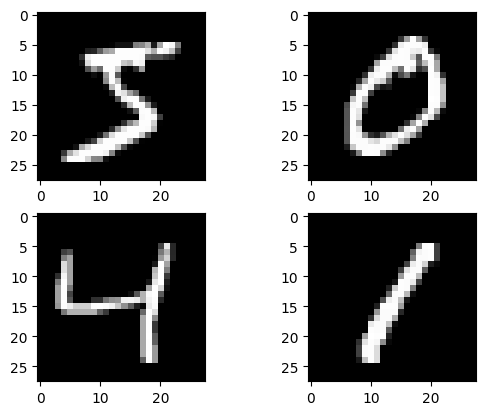

In [ ]:
#tf.keras: es la API de alto nivel de TensorFlow para construir y entrenar modelos de aprendizaje profundo
#Keras: recopila siete de los conjuntos de datos de muestra a través de la clase keras.datasets.
mnist = tf.keras.datasets.mnist
#.load_dat : función que permite cargar el conjunto de datos MNIST
# Tupla de matrices NumPy : (x_train, y_train), (x_test, y_test)
#x_train: Matriz NumPy de datos de imágenes en escala de grises con formas (60000, 28, 28), que contiene los datos de entrenamiento. Los valores de píxeles varían de 0 a 255.
#y_train: Matriz NumPy de etiquetas de dígitos (enteros en el rango 0-9) con forma (60000,)para los datos de entrenamiento.
#x_test:  Matriz NumPy de datos de imágenes en escala de grises con formas (10000, 28, 28), que contiene los datos de prueba. Los valores de píxeles varían de 0 a 255.
#y_test:  Matriz NumPy de etiquetas de dígitos (enteros en el rango 0-9) con forma (10000,)para los datos de prueba.
(x),(y)=mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# subplot(nrows, ncols, index, **kwargs)
# El comando subplot le permite subdividir la ventana de graficación en una retícula de m filas y n columnas.
# La función subplot(m,n,p) separa la figura en una matriz mxn. La variable p identifica la porción de la ventana donde se dibujará la siguiente gráfica.
# plt.subplot(221) de una forma mas general es equivalente a plt.subplot(2, 2, 1)

# plot 4 imagenes en escala de grises
plt.subplot(221)
# función imshow :Esta función permite representar y visualizar matrices o arreglos bidimensionales como imágenes.
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# muestra el plot
plt.show()

#normalizamos
#Para cualquier píxel de la imagen, el valor asignado a ese píxel puede estar entre 0 y 255. Lo que nos lleva a nuestra siguiente línea de código:
x_train = x_train / 255.0
x_test =  x_test / 255.0

In [ ]:
#Edita la cantidad de datos de entrenamiento y prueba.
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
# El conjunto de entrenamiento tenía 60.000 imágenes. El 28,28 se refiere a las dimensiones de cada imagen, 28 píxeles por 28 píxeles.
#print(y_train[0:4])
print(len(y_train))
print(len(x_train))
print(len(x_train[0]))


60000
60000
28


In [ ]:
#la setencia Sequential() hace que podamos ir escribiendo capas de forma ordenada
#y secuencialmente, se irán concatenando según se vayan compilando
model = tf.keras.models.Sequential()

In [ ]:
#añadimos capas

#operacion para aplanar la imagen a un vector, es decir, una matriz a un vector de rango 1
model.add(tf.keras.layers.Flatten())

#capa de 1024 neuronas
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))

#capa de 512 neuronas
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))

#capa de 256 neuronas
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))

#capa de 128 neuronas
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#capa de 64 neuronas
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))

#se añade la función de dropout para apagar neuronas y evitar overfitting
model.add(tf.keras.layers.Dropout(0.2))

#capa de salida compuesta por 10 neuronas, tantas como digitos hay, solo se enciende una gracias a softmax
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
#como loss empleamos un clasificador categórico
#el optimizador es el Adam (estimación del momento adaptativo),  muy común en deep learning
#la variable objetivo es el accuracy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.compile(
optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='acc'
)

In [ ]:
# Una "Epoch" significa que cada muestra del conjunto de datos de entrenamiento ha tenido la oportunidad de actualizar los parámetros internos del modelo.
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2683 - acc: 0.9257
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1344 - acc: 0.9691
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1281 - acc: 0.9742
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1378 - acc: 0.9747
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1611 - acc: 0.9730


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (32, 784)                 0         
                                                                 
 dense_48 (Dense)            (32, 1024)                803840    
                                                                 
 dense_49 (Dense)            (32, 512)                 524800    
                                                                 
 dense_50 (Dense)            (32, 256)                 131328    
                                                                 
 dense_51 (Dense)            (32, 128)                 32896     
                                                                 
 dense_52 (Dense)            (32, 64)                  8256      
                                                                 
 dropout_8 (Dropout)         (32, 64)                 

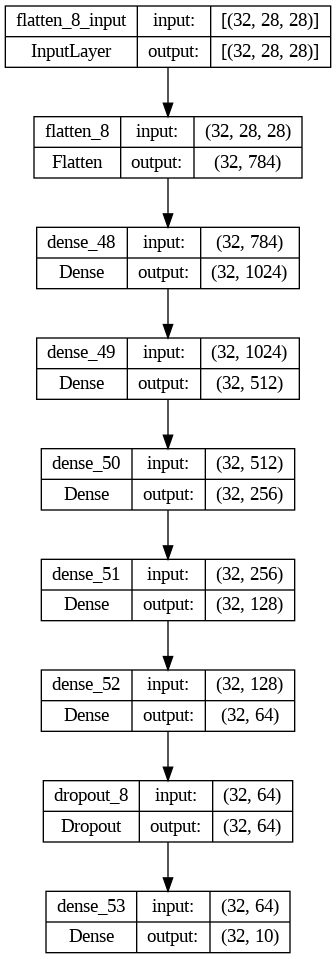

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
score_tr = model.evaluate(x_test, y_test, verbose=1)
print('Train loss    :', score_tr[0])
print('Train accuracy:', score_tr[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.2147 - acc: 0.9730
Train loss    : 0.21470260620117188
Train accuracy: 0.9729999899864197


In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=4)

In [ ]:
#x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten())

#capa de 1024 neuronas
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))

#capa de 512 neuronas
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))

#capa de 256 neuronas
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))

#capa de 128 neuronas
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#capa de 64 neuronas
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))

#se añade la función de dropout para apagar neuronas y evitar overfitting
model.add(tf.keras.layers.Dropout(0.2))

#capa de salida compuesta por 10 neuronas, tantas como digitos hay, solo se enciende una gracias a softmax
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['mae', 'accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2457 - mae: 4.3737 - accuracy: 0.9287
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1148 - mae: 4.3737 - accuracy: 0.9694
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0869 - mae: 4.3737 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0680 - mae: 4.3737 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0540 - mae: 4.3737 - accuracy: 0.9854


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (32, 784)                 0         
                                                                 
 dense_54 (Dense)            (32, 1024)                803840    
                                                                 
 dense_55 (Dense)            (32, 512)                 524800    
                                                                 
 dense_56 (Dense)            (32, 256)                 131328    
                                                                 
 dense_57 (Dense)            (32, 128)                 32896     
                                                                 
 dense_58 (Dense)            (32, 64)                  8256      
                                                                 
 dropout_9 (Dropout)         (32, 64)                 

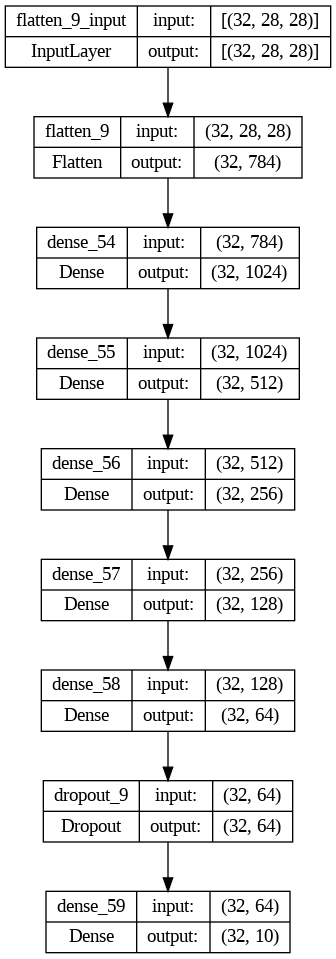

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
score_tr = model.evaluate(x_test, y_test, verbose=1)
print('Train loss    :', score_tr[0])
print('Train mae:', score_tr[1])
print('Train accuracy:', score_tr[2])

313/313 [==============================] - 2s 7ms/step - loss: 0.0857 - mae: 4.3630 - accuracy: 0.9789
Train loss    : 0.08567988127470016
Train mae: 4.3629984855651855
Train accuracy: 0.9789000153541565


In [ ]:
print(x_test.shape)
print(x_train[1].shape)

(10000, 28, 28)
(28, 28)


1/1 [==============================] - 0s 98ms/step
La predicción que haces es un ... 7
La imagen real es un ...


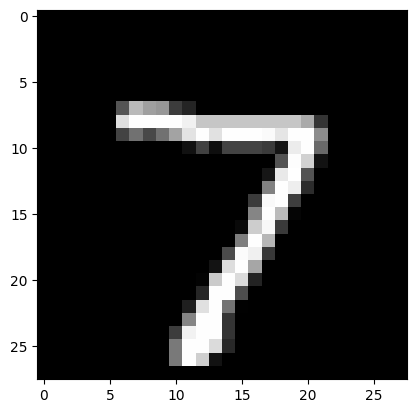

1/1 [==============================] - 0s 23ms/step
La predicción que haces es un ... 2
La imagen real es un ...


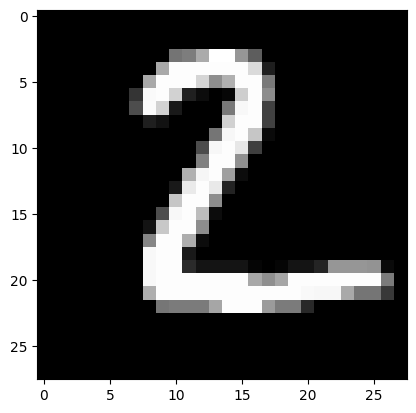

1/1 [==============================] - 0s 25ms/step
La predicción que haces es un ... 1
La imagen real es un ...


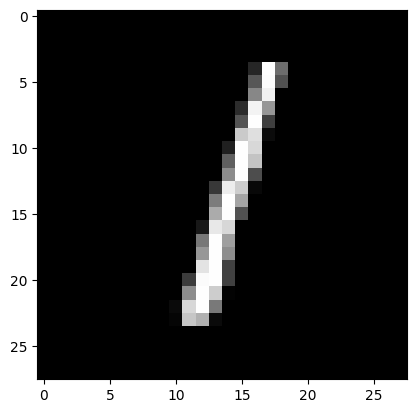

1/1 [==============================] - 0s 21ms/step
La predicción que haces es un ... 0
La imagen real es un ...


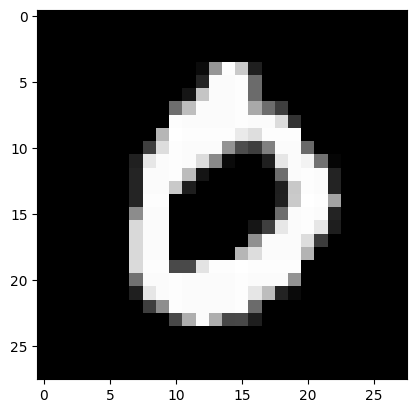

1/1 [==============================] - 0s 27ms/step
La predicción que haces es un ... 4
La imagen real es un ...


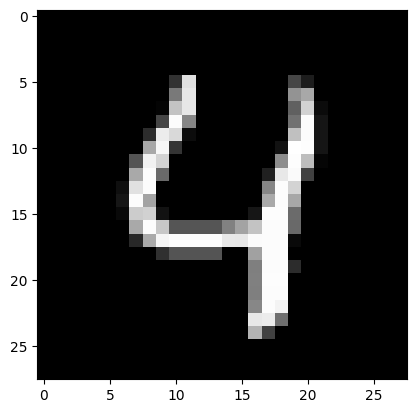

1/1 [==============================] - 0s 30ms/step
La predicción que haces es un ... 1
La imagen real es un ...


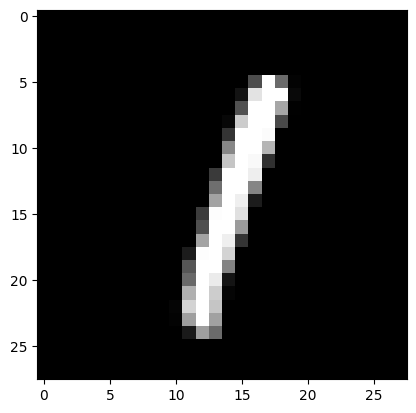

1/1 [==============================] - 0s 30ms/step
La predicción que haces es un ... 4
La imagen real es un ...


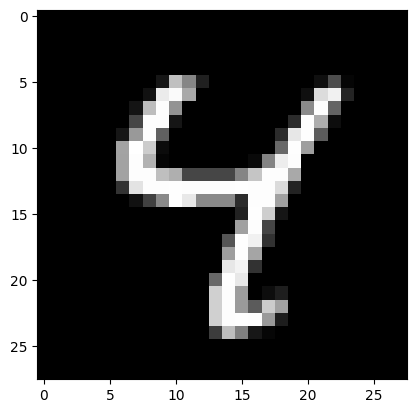

1/1 [==============================] - 0s 30ms/step
La predicción que haces es un ... 9
La imagen real es un ...


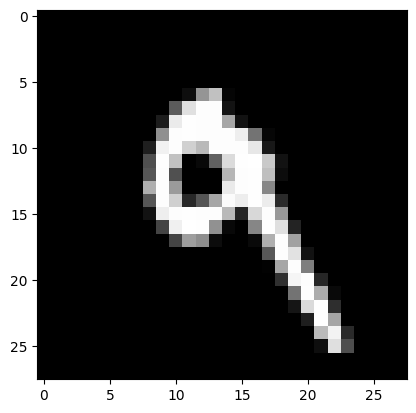

1/1 [==============================] - 0s 30ms/step
La predicción que haces es un ... 5
La imagen real es un ...


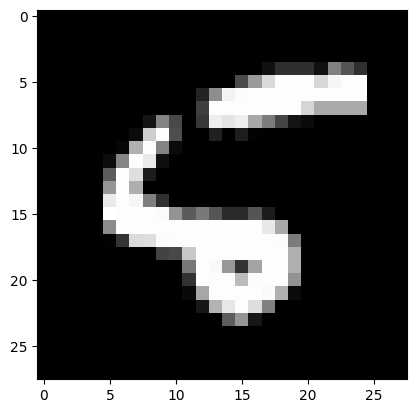

1/1 [==============================] - 0s 34ms/step
La predicción que haces es un ... 9
La imagen real es un ...


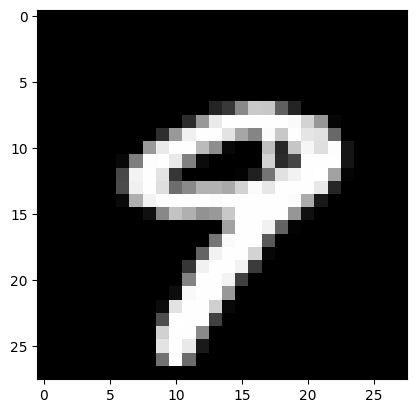

In [ ]:
for index in range(10):
    img = x_test[index]
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1,28,28)
    # predecimos, atentos a cómo llamar al método!!!
    y_pred = model.predict(im2arr)
    print('La predicción que haces es un ... {}'.format(np.argmax(y_pred)))
    print('La imagen real es un ...')
    #visualizamos
    plt.imshow(x_test[index].reshape([28,28]), cmap=plt.get_cmap('gray'))
    plt.show()

#Regresion #

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#cargamos datos
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Suponiendo que tienes imágenes de entrenamiento en X_train (num_samples, height, width, channels)
# y sus etiquetas correspondientes en y_train

# Aplanar las imágenes
X_train_flat = x_train.reshape(x_train.shape[0], -1)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_flat, y_train)

# Para hacer predicciones, también necesitarías aplanar las imágenes de prueba (X_test)
# y luego usar model.predict(X_test_flat) para obtener las predicciones
X_test_flat = x_test.reshape(x_test.shape[0], -1)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train_flat, y_train)

LinearRegression()

In [ ]:
y_train_predict = lin_model.predict(X_train_flat)
MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test_flat)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(5)

Entrenamiento: MSE =3.2048714515374854
Pruebas: MSE =2164091756282283.2


valor real  prediccion  diferencia
0           7    6.309933    0.690067
1           2    2.284115   -0.284115
2           1    1.614110   -0.614110
3           0    0.987979   -0.987979
4           4    4.355811   -0.355811

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly_model = LinearRegression()
poly = PolynomialFeatures(degree=3)

Xpolytrain = poly.fit_transform(X_train_flat)
Xpolytest = poly.fit_transform(X_test_flat)

poly_model.fit(Xpolytrain, y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(5)

##Arboles de decision ##

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5)
dtc.fit(X_train_flat, y_train)
print('la exactitud por el metodo de arbol de decisión es:')
print('por la funcion de metricas es:', accuracy_score(y_test, dtc.predict(X_test_flat)))
print('por la funcion score es:',dtc.score(X_test_flat, y_test))
print('la exactitud para los datos de entrenamiento es:',dtc.score(X_train_flat, y_train))

la exactitud por el metodo de arbol de decisión es:
por la funcion de metricas es: 0.8868
por la funcion score es: 0.8868
la exactitud para los datos de entrenamiento es: 0.9585333333333333


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file = 'dtc.dot')
import graphviz
with open('dtc.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

##Kmeans##

In [ ]:
dataframe=pd.read_csv('mnist_trainn.csv')
dataframe=dataframe.rename(columns={'label':'num'})
dataframe.head()

num  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  28x21  \
0    5    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1    0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2    4    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3    1    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4    9    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [ ]:
columns_names = dataframe.columns.values.tolist()
X=np.array(dataframe[columns_names])
Y=np.array(dataframe['num'])
X.shape

(60000, 785)

### 3 MEANS


In [ ]:
kmeans=KMeans(n_clusters=3).fit(X)
centroids=kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[3.19676034 0.         0.         ... 0.         0.         0.        ]
 [6.38509509 0.         0.         ... 0.         0.         0.        ]
 [3.83449281 0.         0.         ... 0.         0.         0.        ]]


In [ ]:
#Predicting the clusters
labels=kmeans.predict(X)
#Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
  asignar.append(colores[row])
fig=plt.figure()



<Figure size 640x480 with 0 Axes>

In [ ]:
#ver cuantos elementos tiene cada cluster
copy=pd.DataFrame()
for i in columns_names:
  copy[i]=dataframe[i].values
copy['label']=labels;
cantidadGrupo=pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

<ipython-input-21-fbcc49f2b873>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy[i]=dataframe[i].values
<ipython-input-21-fbcc49f2b873>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy[i]=dataframe[i].values
<ipython-input-21-fbcc49f2b873>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co

color  cantidad
0    red     19326
1  green     19403
2   blue     21271

In [ ]:
pd.options.display.max_rows=8
type(copy)
copy['num']=dataframe['num']
copy

num  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x20  28x21  \
0        5    0    0    0    0    0    0    0    0    0  ...      0      0   
1        0    0    0    0    0    0    0    0    0    0  ...      0      0   
2        4    0    0    0    0    0    0    0    0    0  ...      0      0   
3        1    0    0    0    0    0    0    0    0    0  ...      0      0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59996    3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997    5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998    6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999    8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x22  28x23  28x24  28x25  28x26  28x27  28x28  label  
0          0      0      0      0      0      0      0      0  
1          0      0      0      0      0      0      0      0  
2          0      0      0      0      0      0      0      1  
3          0      0      0      0      0      0      0      2  
...      ...    ...    ...    ...    ...    ...    ...    ...  
59996      0      0      0      0      0      0      0      0  
59997      0      0      0      0      0      0      0      1  
59998      0      0      0      0      0      0      0      0  
59999      0      0      0      0      0      0      0      2  

[60000 rows x 786 columns]

In [ ]:
import pandas as pd
pd.options.display.max_rows=None
NODO1=copy[copy['label']==0]['num'].tolist()
NODO2=copy[copy['label']==1]['num'].tolist()
NODO3=copy[copy['label']==2]['num'].tolist()
temp = pd.DataFrame(np.zeros((60000,3)),columns=['red','green','blue'])
temp['red'][0:len(NODO1)]=NODO1
temp['green'][0:len(NODO2)]=NODO2
temp['blue'][0:len(NODO3)]=NODO3
temp.head()

red  green  blue
0  5.0    4.0   1.0
1  0.0    9.0   1.0
2  3.0    2.0   1.0
3  3.0    4.0   3.0
4  6.0    7.0   5.0

In [ ]:
#por ver el representante del grupo, el usuario cercano a su centroide
closest,_=pairwise_distances_argmin_min(kmeans.cluster_centers_,X)
closest

array([35857, 52055, 53594])

***Conclusión ***

Al trabajar con el conjunto de datos MNIST nos proporciona una base sólida y valiosa para comprender y aplicar una variedad de conceptos y técnicas en el campo del aprendizaje automático y la visión por computadora.  A demás nos ayudo para ampliar nuestro conocimiento en lo siguiente:

•	Comprensión de conceptos básicos
•	Exploración de técnicas avanzadas
•	Comparación de algoritmos
•	Aplicación a problemas del mundo real
•	Desafíos y limitaciones

En conclusión , trabajar con el conjunto de datos MNIST es una experiencia educativa valiosa que proporciona una introducción sólida a muchos conceptos y técnicas en aprendizaje automático y visión por computadora, así como una base para explorar problemas más complejos en el futuro.

